Preprocessing Transactions Data

In [466]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for data visualization
import seaborn as sns  # Library for statistical data visualization
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("/Users/gillianmondero/Downloads/Transaction_Data.csv")  

# Display the first five rows of the dataset to get an overview
print(df.head())  

# Print a summary of the dataset, including data types and missing values
print(df.info())  

   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00                 NaN   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5          889  2023-01-01 04:00:00              1793.0   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type  

In [468]:
# Identify duplicate rows in the DataFrame
duplicates = df[df.duplicated()]  

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicates.shape[0]}")  

# Store the shape of the DataFrame before removing duplicates
df_before = df.shape  

# Remove duplicate rows, keeping only the first occurrence
df = df.drop_duplicates()  

# Store the shape of the DataFrame after removing duplicates
df_after = df.shape  

# Print the shape of the DataFrame before and after removing duplicates
print(f"Shape before removing duplicates: {df_before}")  
print(f"Shape after removing duplicates: {df_after}")

Number of duplicate rows: 50
Shape before removing duplicates: (5050, 5)
Shape after removing duplicates: (5000, 5)


In [470]:
# Handle missing values by identifying the number of NaN values in each column
missing_values = df.isnull().sum()  

# Print the count of missing values for each column
print("Missing values in each column:\n", missing_values)  

Missing values in each column:
 Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


In [472]:
# Iterate through each numerical column (float64 and int64 data types) in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:  
    
    # Check if the column is 'Transaction_Amount' to apply specific rounding
    if column == 'Transaction_Amount':  
        
        # Calculate the mean of the 'Transaction_Amount' column, rounded to 2 decimal places
        mean_value = round(df[column].mean(), 2)  
        
        # Fill missing values in 'Transaction_Amount' with the rounded mean
        df[column] = df[column].fillna(mean_value)  
    
    else:  
        # For other numerical columns, fill missing values with the mean (not rounded)
        df[column] = df[column].fillna(df[column].mean())  

# Print the updated DataFrame after handling missing values
print(df)  

      Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0                  1          393  2023-01-01 00:00:00             3472.00   
1                  2          826  2023-01-01 01:00:00             3102.05   
2                  3          916  2023-01-01 02:00:00               10.00   
3                  4          109  2023-01-01 03:00:00               72.00   
4                  5          889  2023-01-01 04:00:00             1793.00   
...              ...          ...                  ...                 ...   
4995            4996          175  2023-07-28 03:00:00             2755.00   
4996            4997          338  2023-07-28 04:00:00             3555.00   
4997            4998          694  2023-07-28 05:00:00             3003.00   
4998            4999          940  2023-07-28 06:00:00              790.00   
4999            5000          353  2023-07-28 07:00:00              955.00   

     Transaction_Type  
0            Purchase  
1        Bill P

In [474]:
# Confirm no missing values remain by checking for null values in each column
missing_values_after = df.isnull().sum()  

# Print the count of missing values for each column after imputation
print("Missing values after imputation:\n", missing_values_after)  

Missing values after imputation:
 Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Amount    0
Transaction_Type      0
dtype: int64


In [476]:
# Perform one-hot encoding to convert the 'Transaction_Type' categorical column into numerical format
df_encoded = pd.get_dummies(df, columns=['Transaction_Type'], prefix='Type', drop_first=False)  

# Display the first five rows of the updated dataset to confirm the encoding
df_encoded.head()  

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Type_Bill Payment,Type_Investment,Type_Loan Payment,Type_Purchase
0,1,393,2023-01-01 00:00:00,3472.00,False,False,False,True
1,2,826,2023-01-01 01:00:00,3102.05,True,False,False,False
2,3,916,2023-01-01 02:00:00,10.00,False,False,False,True
3,4,109,2023-01-01 03:00:00,72.00,False,True,False,False
4,5,889,2023-01-01 04:00:00,1793.00,False,True,False,False


In [478]:
# Convert the 'Transaction_Date' column to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])  

# Print the updated DataFrame to confirm the changes
print(df)  

      Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0                  1          393 2023-01-01 00:00:00             3472.00   
1                  2          826 2023-01-01 01:00:00             3102.05   
2                  3          916 2023-01-01 02:00:00               10.00   
3                  4          109 2023-01-01 03:00:00               72.00   
4                  5          889 2023-01-01 04:00:00             1793.00   
...              ...          ...                 ...                 ...   
4995            4996          175 2023-07-28 03:00:00             2755.00   
4996            4997          338 2023-07-28 04:00:00             3555.00   
4997            4998          694 2023-07-28 05:00:00             3003.00   
4998            4999          940 2023-07-28 06:00:00              790.00   
4999            5000          353 2023-07-28 07:00:00              955.00   

     Transaction_Type  
0            Purchase  
1        Bill Payment  
2  

In [480]:
# Calculate skewness for the 'Transaction_Amount' column
skewness_transaction_amount = df[['Transaction_Amount']].skew()  

# Display the calculated skewness value
skewness_transaction_amount  

Transaction_Amount    26.403948
dtype: float64

In [482]:
# Calculate the first quartile (Q1) of 'Transaction_Amount'
Q1 = df['Transaction_Amount'].quantile(0.25)  

# Calculate the third quartile (Q3) of 'Transaction_Amount'
Q3 = df['Transaction_Amount'].quantile(0.75)  

# Compute the Interquartile Range (IQR), which measures data spread
IQR = Q3 - Q1  

# Define lower and upper bounds for outliers based on the IQR method
lower_bound = Q1 - 1.5 * IQR  # Anything below this is considered an outlier
upper_bound = Q3 + 1.5 * IQR  # Anything above this is considered an outlier

# Print the calculated IQR-based bounds
print(f"IQR-based bounds for outliers: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")  

IQR-based bounds for outliers: Lower Bound = -2373.0, Upper Bound = 7315.0


In [484]:
# Compute the median value of 'Transaction_Amount' for imputation
median_value = df['Transaction_Amount'].median()  

# Print the median value to be used for replacing outliers
print(f"Median value for Transaction_Amount: {median_value}")  

Median value for Transaction_Amount: 2539.0


In [486]:
# Impute outliers and the specific value '10' with the median
df['Transaction_Amount'] = df['Transaction_Amount'].apply(
    lambda x: median_value if x < lower_bound or x > upper_bound or x == 10 else x
)  

# Identify any remaining outliers after imputation
remaining_outliers = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]  

# Print the updated DataFrame to see changes
print("\nUpdated DataFrame after outlier treatment:\n")
print(df)

# Print remaining outliers, if any
print("\nRemaining outliers after imputation:\n")
print(remaining_outliers)


Updated DataFrame after outlier treatment:

      Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0                  1          393 2023-01-01 00:00:00             3472.00   
1                  2          826 2023-01-01 01:00:00             3102.05   
2                  3          916 2023-01-01 02:00:00             2539.00   
3                  4          109 2023-01-01 03:00:00               72.00   
4                  5          889 2023-01-01 04:00:00             1793.00   
...              ...          ...                 ...                 ...   
4995            4996          175 2023-07-28 03:00:00             2755.00   
4996            4997          338 2023-07-28 04:00:00             3555.00   
4997            4998          694 2023-07-28 05:00:00             3003.00   
4998            4999          940 2023-07-28 06:00:00              790.00   
4999            5000          353 2023-07-28 07:00:00              955.00   

     Transaction_Type  
0     

In [488]:
# Check if all outliers were successfully handled
if remaining_outliers.empty:  
    print("All outliers have been successfully handled.")  
else:  
    print(f"There are still {remaining_outliers.shape[0]} outliers remaining:")  
    print(remaining_outliers)  

# Print the first few rows of the updated DataFrame to verify changes
print("\nFirst few rows of the updated DataFrame:")  
print(df.head()) 

All outliers have been successfully handled.

First few rows of the updated DataFrame:
   Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0               1          393 2023-01-01 00:00:00             3472.00   
1               2          826 2023-01-01 01:00:00             3102.05   
2               3          916 2023-01-01 02:00:00             2539.00   
3               4          109 2023-01-01 03:00:00               72.00   
4               5          889 2023-01-01 04:00:00             1793.00   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  


In [490]:
# Calculate skewness for Transaction_Amount 
skewness_transaction_amount = df[['Transaction_Amount']].skew()

# Display skewness
skewness_transaction_amount

Transaction_Amount    0.004939
dtype: float64

In [492]:
# Convert the 'Transaction_Date' column to datetime format for time-based calculations
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Print the first few rows to confirm the conversion
print("\nUpdated DataFrame with Transaction_Date as datetime:\n")
print(df.head())


Updated DataFrame with Transaction_Date as datetime:

   Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0               1          393 2023-01-01 00:00:00             3472.00   
1               2          826 2023-01-01 01:00:00             3102.05   
2               3          916 2023-01-01 02:00:00             2539.00   
3               4          109 2023-01-01 03:00:00               72.00   
4               5          889 2023-01-01 04:00:00             1793.00   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  


In [494]:
# Aggregate features by 'Customer_ID' to create customer-level metrics
customer_features = df.groupby('Customer_ID').agg(
    
    # Count the number of transactions per customer
    Transactions_Per_Customer=('Customer_ID', 'size'),
    
    # Calculate the average transaction amount per customer
    Average_Transaction_Amount=('Transaction_Amount', 'mean'),
    
    # Calculate the total transaction amount per customer
    Total_Transaction_Amount=('Transaction_Amount', 'sum'),
    
    # Compute recency: days since the last transaction (based on the most recent transaction date in the dataset)
    Recency=('Transaction_Date', lambda x: (df['Transaction_Date'].max() - x.max()).days),
    
    # Dynamically sum up all one-hot encoded transaction types (columns that start with 'Type_')
    **{f'Count_{col}': (col, 'sum') for col in df.columns if col.startswith('Type_')}
).reset_index()

# Print the aggregated customer features
print("\nCustomer-Level Aggregated Features:\n")
print(customer_features.head())


Customer-Level Aggregated Features:

   Customer_ID  Transactions_Per_Customer  Average_Transaction_Amount  \
0            1                          6                      2806.0   
1            2                          2                      2453.5   
2            3                          1                      1538.0   
3            4                          2                      4147.5   
4            5                          5                      2959.6   

   Total_Transaction_Amount  Recency  
0                   16836.0       26  
1                    4907.0       67  
2                    1538.0      150  
3                    8295.0       28  
4                   14798.0        1  


In [496]:
# Round the average and total transaction amounts to 2 decimal places for better readability
customer_features['Average_Transaction_Amount'] = customer_features['Average_Transaction_Amount'].round(2)
customer_features['Total_Transaction_Amount'] = customer_features['Total_Transaction_Amount'].round(2)

# Print the customer features after rounding
print("\nCustomer Features after rounding transaction amounts:\n")
print(customer_features.head())


Customer Features after rounding transaction amounts:

   Customer_ID  Transactions_Per_Customer  Average_Transaction_Amount  \
0            1                          6                      2806.0   
1            2                          2                      2453.5   
2            3                          1                      1538.0   
3            4                          2                      4147.5   
4            5                          5                      2959.6   

   Total_Transaction_Amount  Recency  
0                   16836.0       26  
1                    4907.0       67  
2                    1538.0      150  
3                    8295.0       28  
4                   14798.0        1  


In [498]:
# Compute summary statistics (mean, median, and standard deviation) for key customer-level features
summary_stats = customer_features[['Transactions_Per_Customer', 'Average_Transaction_Amount', 
                                   'Total_Transaction_Amount', 'Recency']].agg(['mean', 'median', 'std'])

# Print the summary statistics to analyze customer transaction behavior
print("\nSummary Statistics of Customer Transactions:\n")
print(summary_stats)


Summary Statistics of Customer Transactions:

        Transactions_Per_Customer  Average_Transaction_Amount  \
mean                     5.035247                 2502.288550   
median                   5.000000                 2461.500000   
std                      2.185861                  754.453835   

        Total_Transaction_Amount    Recency  
mean                12589.125881  38.716012  
median              11966.000000  28.000000  
std                  6411.157244  36.396809  


In [500]:
# Initialize the MinMaxScaler to scale numerical features between 0 and 1
scaler = MinMaxScaler()
print("\nMinMaxScaler initialized.")

# List of numerical columns to be normalized
numerical_columns = [
    'Transactions_Per_Customer', 
    'Average_Transaction_Amount', 
    'Total_Transaction_Amount', 
    'Recency'
]
print("\nNumerical columns selected for normalization:", numerical_columns)


MinMaxScaler initialized.

Numerical columns selected for normalization: ['Transactions_Per_Customer', 'Average_Transaction_Amount', 'Total_Transaction_Amount', 'Recency']


In [502]:
# Create a copy of the customer features DataFrame to apply normalization
customer_features_normalized = customer_features.copy()
print("\nCopy of customer features DataFrame created.")

# Apply MinMax scaling to the selected numerical columns
customer_features_normalized[numerical_columns] = scaler.fit_transform(customer_features[numerical_columns])

# Print the first few rows of the normalized dataset to verify changes
print("\nFirst few rows of normalized customer features:\n")
print(customer_features_normalized.head())


Copy of customer features DataFrame created.

First few rows of normalized customer features:

   Customer_ID  Transactions_Per_Customer  Average_Transaction_Amount  \
0            1                   0.416667                    0.535373   
1            2                   0.083333                    0.460484   
2            3                   0.000000                    0.265987   
3            4                   0.083333                    0.820374   
4            5                   0.333333                    0.568005   

   Total_Transaction_Amount   Recency  
0                  0.447358  0.131980  
1                  0.124909  0.340102  
2                  0.033842  0.761421  
3                  0.216489  0.142132  
4                  0.392269  0.005076  


In [504]:
# Check the min and max values of the normalized columns to confirm scaling
print("\nMin values after scaling:\n", customer_features_normalized[numerical_columns].min())
print("\nMax values after scaling:\n", customer_features_normalized[numerical_columns].max())


Min values after scaling:
 Transactions_Per_Customer     0.0
Average_Transaction_Amount    0.0
Total_Transaction_Amount      0.0
Recency                       0.0
dtype: float64

Max values after scaling:
 Transactions_Per_Customer     1.0
Average_Transaction_Amount    1.0
Total_Transaction_Amount      1.0
Recency                       1.0
dtype: float64


In [506]:
# Print the shape of the normalized DataFrame to confirm the number of records
print("\nShape of the normalized DataFrame:", customer_features_normalized.shape)


Shape of the normalized DataFrame: (993, 5)


In [508]:
# Print the original DataFrame to ensure it remains unchanged
print("\nOriginal DataFrame:\n")
print(df.head())


Original DataFrame:

   Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0               1          393 2023-01-01 00:00:00             3472.00   
1               2          826 2023-01-01 01:00:00             3102.05   
2               3          916 2023-01-01 02:00:00             2539.00   
3               4          109 2023-01-01 03:00:00               72.00   
4               5          889 2023-01-01 04:00:00             1793.00   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  


In [510]:
# Display the summary statistics in the output
print("Summary Statistics for Critical Features:")
print(summary_stats)

Summary Statistics for Critical Features:
        Transactions_Per_Customer  Average_Transaction_Amount  \
mean                     5.035247                 2502.288550   
median                   5.000000                 2461.500000   
std                      2.185861                  754.453835   

        Total_Transaction_Amount    Recency  
mean                12589.125881  38.716012  
median              11966.000000  28.000000  
std                  6411.157244  36.396809  


In [512]:
# We will now proceed with EDA
# EDA 1: Distribution of Transactions Per Customer
# Compute the number of transactions per customer
transactions_per_customer = df.groupby('Customer_ID').size()

# Print summary statistics for Transactions Per Customer
print("\nSummary Statistics: Transactions Per Customer\n", transactions_per_customer.describe())


Summary Statistics: Transactions Per Customer
 count    993.000000
mean       5.035247
std        2.185861
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       13.000000
dtype: float64


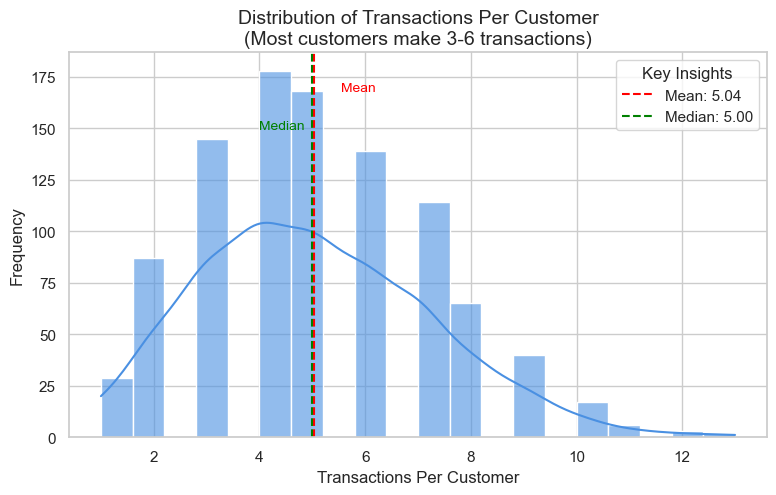


Sample Transactions Per Customer:
 Customer_ID
1    6
2    2
3    1
4    2
5    5
dtype: int64


In [514]:
# Visualization: Histogram for Transactions Per Customer
plt.figure(figsize=(9, 5))

# Create histogram with improved formatting
sns.histplot(transactions_per_customer, bins=20, kde=True, color='#4A90E2', alpha=0.6)

# Title & Labels with added explanation
plt.title('Distribution of Transactions Per Customer\n(Most customers make 3-6 transactions)', fontsize=14)
plt.xlabel('Transactions Per Customer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding mean and median markers
mean_val = transactions_per_customer.mean()
median_val = transactions_per_customer.median()

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

# Adding text annotations for readability
plt.text(mean_val + 0.5, plt.ylim()[1] * 0.9, 'Mean', color='red', fontsize=10)
plt.text(median_val - 1, plt.ylim()[1] * 0.8, 'Median', color='green', fontsize=10)

# Show legend to clarify KDE curve
plt.legend(title="Key Insights")

plt.show()

# Print the first few values of transactions per customer
print("\nSample Transactions Per Customer:\n", transactions_per_customer.head())

In [515]:
# EDA 2: Distribution of Average Transaction Amount Per Customer

# Compute the average transaction amount per customer
avg_transaction_amount = df.groupby('Customer_ID')['Transaction_Amount'].mean()

# Print summary statistics for Average Transaction Amount Per Customer
print("\nSummary Statistics: Average Transaction Amount Per Customer\n", avg_transaction_amount.describe())


Summary Statistics: Average Transaction Amount Per Customer
 count     993.000000
mean     2502.288590
std       754.453723
min       286.000000
25%      2020.500000
50%      2461.500000
75%      2930.750000
max      4993.000000
Name: Transaction_Amount, dtype: float64


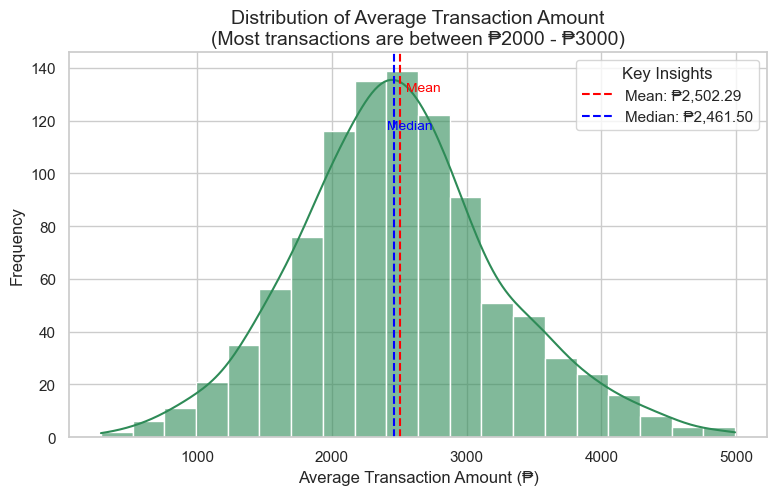


Sample Average Transaction Amount Per Customer:
 Customer_ID
1    2806.0
2    2453.5
3    1538.0
4    4147.5
5    2959.6
Name: Transaction_Amount, dtype: float64


In [518]:
# Visualization: Histogram for Average Transaction Amount (in PHP ₱)
plt.figure(figsize=(9, 5))

# Create histogram with better formatting
sns.histplot(avg_transaction_amount, bins=20, kde=True, color='#2E8B57', alpha=0.6)

# Title & Labels with Peso sign
plt.title('Distribution of Average Transaction Amount\n(Most transactions are between ₱2000 - ₱3000)', fontsize=14)
plt.xlabel('Average Transaction Amount (₱)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Calculate mean and median values
mean_val = avg_transaction_amount.mean()
median_val = avg_transaction_amount.median()

# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: ₱{mean_val:,.2f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: ₱{median_val:,.2f}')

# Add text annotations for better understanding
plt.text(mean_val + 50, plt.ylim()[1] * 0.9, 'Mean', color='red', fontsize=10)
plt.text(median_val - 50, plt.ylim()[1] * 0.8, 'Median', color='blue', fontsize=10)

# Show legend to clarify KDE curve
plt.legend(title="Key Insights")

plt.show()

# Print the first few values of average transaction amount per customer
print("\nSample Average Transaction Amount Per Customer:\n", avg_transaction_amount.head())

In [520]:
# EDA 3: Distribution of Total Transaction Amount Per Customer
# Compute the total transaction amount per customer
total_transaction_amount = df.groupby('Customer_ID')['Transaction_Amount'].sum()

# Print summary statistics for Total Transaction Amount Per Customer
print("\nSummary Statistics: Total Transaction Amount Per Customer\n", total_transaction_amount.describe())


Summary Statistics: Total Transaction Amount Per Customer
 count      993.000000
mean     12589.125881
std       6411.157244
min        286.000000
25%       7789.000000
50%      11966.000000
75%      16457.000000
max      37281.000000
Name: Transaction_Amount, dtype: float64


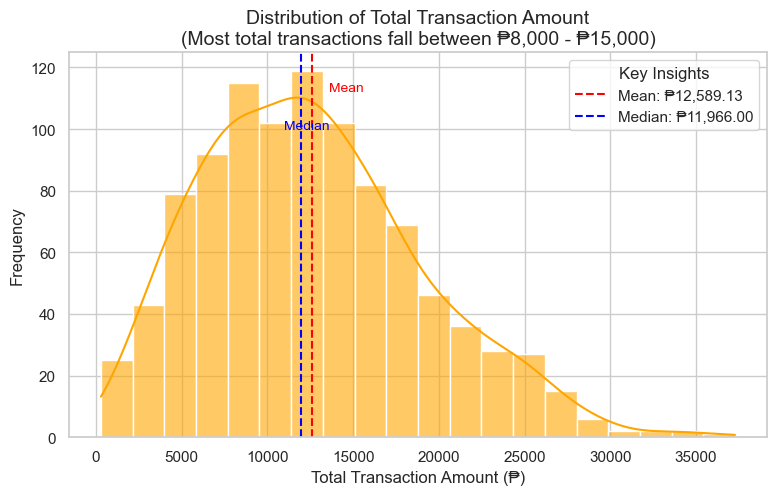


Sample Total Transaction Amount Per Customer:
 Customer_ID
1    16836.0
2     4907.0
3     1538.0
4     8295.0
5    14798.0
Name: Transaction_Amount, dtype: float64


In [522]:
# Visualization: Histogram for Total Transaction Amount (in PHP ₱)
plt.figure(figsize=(9, 5))

# Create histogram with better formatting
sns.histplot(total_transaction_amount, bins=20, kde=True, color='#FFA500', alpha=0.6)

# Title & Labels with Peso sign
plt.title('Distribution of Total Transaction Amount\n(Most total transactions fall between ₱8,000 - ₱15,000)', fontsize=14)
plt.xlabel('Total Transaction Amount (₱)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Calculate mean and median values
mean_val = total_transaction_amount.mean()
median_val = total_transaction_amount.median()

# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: ₱{mean_val:,.2f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: ₱{median_val:,.2f}')

# Add text annotations for better understanding
plt.text(mean_val + 1000, plt.ylim()[1] * 0.9, 'Mean', color='red', fontsize=10)
plt.text(median_val - 1000, plt.ylim()[1] * 0.8, 'Median', color='blue', fontsize=10)

# Show legend to clarify KDE curve
plt.legend(title="Key Insights")

plt.show()

# Print the first few values of total transaction amount per customer
print("\nSample Total Transaction Amount Per Customer:\n", total_transaction_amount.head())

In [524]:
# EDA 4: Distribution of Recency (Days Since Last Transaction)
# Compute recency (days since last transaction) per customer
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])  # Ensure it's in datetime format
recency = df.groupby('Customer_ID')['Transaction_Date'].max().apply(lambda x: (df['Transaction_Date'].max() - x).days)

# Print summary statistics for Recency
print("\nSummary Statistics: Recency (Days Since Last Transaction)\n", recency.describe())


Summary Statistics: Recency (Days Since Last Transaction)
 count    993.000000
mean      38.716012
std       36.396809
min        0.000000
25%       11.000000
50%       28.000000
75%       56.000000
max      197.000000
Name: Transaction_Date, dtype: float64


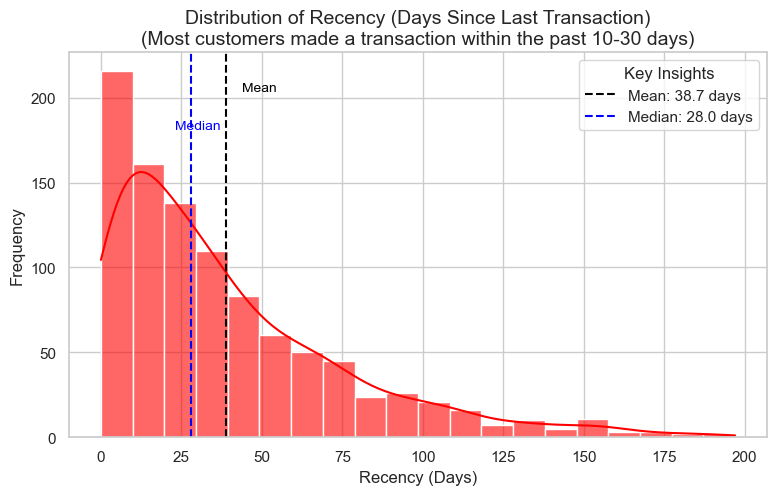


Sample Recency (Days Since Last Transaction) Per Customer:
 Customer_ID
1     26
2     67
3    150
4     28
5      1
Name: Transaction_Date, dtype: int64


In [526]:
# Visualization: Histogram for Recency (Days Since Last Transaction)
plt.figure(figsize=(9, 5))

# Create histogram with better formatting
sns.histplot(recency, bins=20, kde=True, color='red', alpha=0.6)

# Title & Labels with a clear insight
plt.title('Distribution of Recency (Days Since Last Transaction)\n(Most customers made a transaction within the past 10-30 days)', fontsize=14)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Calculate mean and median values
mean_val = recency.mean()
median_val = recency.median()

# Add vertical lines for mean and median
plt.axvline(mean_val, color='black', linestyle='--', label=f'Mean: {mean_val:.1f} days')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.1f} days')

# Add text annotations for better understanding
plt.text(mean_val + 5, plt.ylim()[1] * 0.9, 'Mean', color='black', fontsize=10)
plt.text(median_val - 5, plt.ylim()[1] * 0.8, 'Median', color='blue', fontsize=10)

# Show legend to clarify KDE curve
plt.legend(title="Key Insights")

plt.show()

# Print the first few values of recency per customer
print("\nSample Recency (Days Since Last Transaction) Per Customer:\n", recency.head())

In [528]:
# EDA 5: Scatterplot - Total Transaction Amount vs Recency

# Find the latest transaction date to calculate recency
print("\nFinding the most recent transaction date in the dataset...\n")
current_date = df['Transaction_Date'].max()
print(f"Most recent transaction date: {current_date}\n")


Finding the most recent transaction date in the dataset...

Most recent transaction date: 2023-07-28 07:00:00



In [530]:
# Compute Recency (Days Since Last Transaction) per Customer
print("\nCalculating Recency (Days Since Last Transaction) for each customer...\n")
recency = df.groupby('Customer_ID')['Transaction_Date'].max().apply(lambda x: (current_date - x).days)
print("Recency calculation completed! Here are the first few values:\n", recency.head())


Calculating Recency (Days Since Last Transaction) for each customer...

Recency calculation completed! Here are the first few values:
 Customer_ID
1     26
2     67
3    150
4     28
5      1
Name: Transaction_Date, dtype: int64


In [532]:
# Compute Total Transaction Amount per Customer
print("\nCalculating Total Transaction Amount per Customer...\n")
total_transaction_amount = df.groupby('Customer_ID')['Transaction_Amount'].sum()
print("Total Transaction Amount", total_transaction_amount.head())


Calculating Total Transaction Amount per Customer...

Total Transaction Amount Customer_ID
1    16836.0
2     4907.0
3     1538.0
4     8295.0
5    14798.0
Name: Transaction_Amount, dtype: float64



Generating Scatter Plot: Total Transaction Amount vs Recency...


Calculating correlation between Recency and Total Transaction Amount...

Correlation coefficient: -0.350



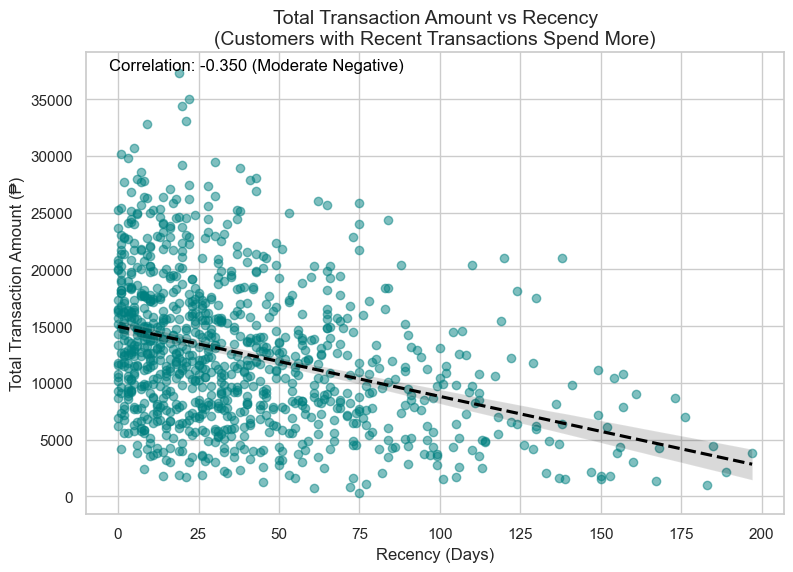

In [534]:
# Visualization: Scatterplot - Total Transaction Amount vs Recency
# Improved Scatterplot: Total Transaction Amount vs Recency
print("\nGenerating Scatter Plot: Total Transaction Amount vs Recency...\n")  # Removed extra indentation
plt.figure(figsize=(9, 6))

# Create scatter plot with regression trend line for clarity
sns.regplot(x=recency, 
            y=total_transaction_amount, 
            scatter_kws={'alpha': 0.5, 'color': 'teal'}, 
            line_kws={'color': 'black', 'linestyle': '--'})

# Title & Labels with clearer insights
plt.title('Total Transaction Amount vs Recency\n(Customers with Recent Transactions Spend More)', fontsize=14)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Total Transaction Amount (₱)', fontsize=12)

# Compute correlation between Recency and Total Transaction Amount
print("\nCalculating correlation between Recency and Total Transaction Amount...\n")
correlation_total_trans = recency.corr(total_transaction_amount)
print(f"Correlation coefficient: {correlation_total_trans:.3f}\n")

# Add annotation for correlation coefficient
plt.figtext(0.15, 0.85, f'Correlation: {correlation_total_trans:.3f} (Moderate Negative)', fontsize=12, color='black')

# Show the scatter plot
plt.show()

In [535]:
# Create a copy of the dataset for feature engineering
df_fe = df.copy()

# Feature 1: Recency (Days Since Last Transaction)
df_fe['Recency'] = df_fe.groupby('Customer_ID')['Transaction_Date'].transform(lambda x: (df_fe['Transaction_Date'].max() - x.max()).days)
print("\nSample Recency Values:\n", df_fe[['Customer_ID', 'Recency']].drop_duplicates().head())


Sample Recency Values:
    Customer_ID  Recency
0          393        5
1          826       12
2          916       31
3          109       75
4          889      105


In [538]:
# Feature 2: Frequency (Number of Transactions Per Customer)
df_fe['Frequency'] = df_fe.groupby('Customer_ID')['Transaction_ID'].transform('count')

print("\nSample Frequency Values:\n", df_fe[['Customer_ID', 'Frequency']].drop_duplicates().head())


Sample Frequency Values:
    Customer_ID  Frequency
0          393          7
1          826          3
2          916          9
3          109          5
4          889          3


In [540]:
# Feature 3: Monetary Value (Total Transaction Amount Per Customer)
df_fe['Monetary_Value'] = df_fe.groupby('Customer_ID')['Transaction_Amount'].transform('sum')

print("\nSample Monetary Values:\n", df_fe[['Customer_ID', 'Monetary_Value']].drop_duplicates().head())


Sample Monetary Values:
    Customer_ID  Monetary_Value
0          393        22365.00
1          826         7548.05
2          916        20935.00
3          109         7492.00
4          889         6426.05


In [542]:
# Feature 4: Transaction Amount Variability (Standard Deviation / Mean)
df_fe['Transaction_Amount_Variability'] = df_fe.groupby('Customer_ID')['Transaction_Amount'].transform(
    lambda x: np.std(x) / np.mean(x) if np.mean(x) > 0 else 0
)
print("\nSample Transaction Amount Variability:\n", df_fe[['Customer_ID', 'Transaction_Amount_Variability']].drop_duplicates().head())


Sample Transaction Amount Variability:
    Customer_ID  Transaction_Amount_Variability
0          393                        0.345569
1          826                        0.638205
2          916                        0.586407
3          109                        1.192018
4          889                        0.320829


In [544]:
# Feature 5: Days Since First Transaction
df_fe['Days_Since_First_Transaction'] = df_fe.groupby('Customer_ID')['Transaction_Date'].transform(lambda x: (x.max() - x.min()).days)

print("\nSample Days Since First Transaction:\n", df_fe[['Customer_ID', 'Days_Since_First_Transaction']].drop_duplicates().head())


Sample Days Since First Transaction:
    Customer_ID  Days_Since_First_Transaction
0          393                           203
1          826                           195
2          916                           176
3          109                           132
4          889                           102


In [546]:
# Feature 6: Average Transaction Gap (Time Between Transactions)
df_fe['Avg_Transaction_Gap'] = df_fe['Days_Since_First_Transaction'] / df_fe['Frequency']

# Handle division by zero by replacing inf values with NaN in df_fe
df_fe['Avg_Transaction_Gap'] = df_fe['Avg_Transaction_Gap'].replace([np.inf, -np.inf], np.nan)  
# Fill NaN with median in df_fe
df_fe['Avg_Transaction_Gap'] = df_fe['Avg_Transaction_Gap'].fillna(df_fe['Avg_Transaction_Gap'].median())  

print("\nSample Average Transaction Gap:\n", df_fe[['Customer_ID', 'Avg_Transaction_Gap']].drop_duplicates().head())


Sample Average Transaction Gap:
    Customer_ID  Avg_Transaction_Gap
0          393            29.000000
1          826            65.000000
2          916            19.555556
3          109            26.400000
4          889            34.000000


In [548]:
# Feature 7: Is Weekend (Binary Feature)
df_fe['Is_Weekend'] = df_fe['Transaction_Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

print("\nSample Is Weekend Values:\n", df_fe[['Customer_ID', 'Is_Weekend']].drop_duplicates().head())


Sample Is Weekend Values:
    Customer_ID  Is_Weekend
0          393           1
1          826           1
2          916           1
3          109           1
4          889           1


In [550]:
# Feature 8: Frequent Large Spender (Binary Feature)
threshold = df_fe['Transaction_Amount'].quantile(0.75)
df_fe['Frequent_Large_Spender'] = df_fe.groupby('Customer_ID')['Transaction_Amount'].transform(
    lambda x: 1 if (x > threshold).mean() > 0.5 else 0
)
print("\nSample Frequent Large Spender Values:\n", df_fe[['Customer_ID', 'Frequent_Large_Spender']].drop_duplicates().head())


Sample Frequent Large Spender Values:
    Customer_ID  Frequent_Large_Spender
0          393                       0
1          826                       0
2          916                       0
3          109                       0
4          889                       0


In [552]:
# Final Cleaned Dataset for Feature Engineering
features_for_clustering = ['Recency', 'Frequency', 'Monetary_Value', 'Transaction_Amount_Variability', 
                           'Days_Since_First_Transaction', 'Avg_Transaction_Gap', 'Is_Weekend', 
                           'Frequent_Large_Spender']

df_feature_engineered = df_fe.groupby('Customer_ID')[features_for_clustering].mean().reset_index()

# Display the first few rows of the feature-engineered dataset
print("\nFeature Engineered Data:\n")
print(df_feature_engineered.head())


Feature Engineered Data:

   Customer_ID  Recency  Frequency  Monetary_Value  \
0            1     26.0        6.0         16836.0   
1            2     67.0        2.0          4907.0   
2            3    150.0        1.0          1538.0   
3            4     28.0        2.0          8295.0   
4            5      1.0        5.0         14798.0   

   Transaction_Amount_Variability  Days_Since_First_Transaction  \
0                        0.670928                         180.0   
1                        0.161606                         104.0   
2                        0.000000                           0.0   
3                        0.141893                         158.0   
4                        0.419043                         157.0   

   Avg_Transaction_Gap  Is_Weekend  Frequent_Large_Spender  
0                 30.0    0.166667                     0.0  
1                 52.0    0.500000                     0.0  
2                  0.0    0.000000                     0.0  
3

In [554]:
# Save the feature-engineered transaction data
df_feature_engineered.to_csv('feature_engineered_transactions.csv', index=False) 

Preprocessing Customer Feedback Data

In [557]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("/Users/gillianmondero/Downloads/Customer_Feedback_Data.csv")

# Display the first few rows of the dataset to get an overview of the data structure
print("\nFirst few rows of the dataset:\n", df.head())


First few rows of the dataset:
    Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7


In [559]:
# Display dataset information including column names, data types, and non-null values
print("\nDataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB
None


In [561]:
# Identify and count duplicate rows in the dataset
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")


Number of duplicate rows: 81


In [563]:
# Store the shape of the dataset before removing duplicates
df_before = df.shape

# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Store the shape of the dataset after removing duplicates
df_after = df.shape

# Print the dataset dimensions before and after duplicate removal
print(f"\nShape before removing duplicates: {df_before}")
print(f"Shape after removing duplicates: {df_after}")


Shape before removing duplicates: (5050, 4)
Shape after removing duplicates: (4969, 4)


In [565]:
# Identify missing values in each column of the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 Customer_ID                  0
Satisfaction_Score         100
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


In [567]:
# Fill missing values in the Satisfaction_Score column using the median value
df['Satisfaction_Score'] = df['Satisfaction_Score'].fillna(df['Satisfaction_Score'].median())

# Print the number of missing values after imputation to confirm it's handled
print("\nMissing values in Satisfaction_Score after imputation:\n", df['Satisfaction_Score'].isnull().sum())


Missing values in Satisfaction_Score after imputation:
 0


In [569]:
# Convert the Feedback_Comments column to a categorical data type
df['Feedback_Comments'] = df['Feedback_Comments'].astype('category')

# Encode the categorical Feedback_Comments column into numerical values
df['Feedback_Comments_Encoded'] = df['Feedback_Comments'].cat.codes

# Display the original and encoded Feedback_Comments values to confirm the transformation
print("\nOriginal and Encoded Feedback_Comments:\n", df[['Feedback_Comments', 'Feedback_Comments_Encoded']].head())


Original and Encoded Feedback_Comments:
    Feedback_Comments  Feedback_Comments_Encoded
0     Very satisfied                          4
1     Very satisfied                          4
2     Very satisfied                          4
3  Needs improvement                          2
4     Unsatisfactory                          3


In [571]:
# Calculate skewness for numerical columns to check for distribution asymmetry
skewness = df[['Satisfaction_Score', 'Likelihood_to_Recommend']].skew()
print("\nSkewness of numeric columns:\n", skewness)


Skewness of numeric columns:
 Satisfaction_Score         5.356323
Likelihood_to_Recommend   -0.017615
dtype: float64


In [573]:
# Compute the interquartile range (IQR) for Satisfaction_Score to identify potential outliers
Q1 = df['Satisfaction_Score'].quantile(0.25)
Q3 = df['Satisfaction_Score'].quantile(0.75)
IQR = Q3 - Q1
print("\nIQR for Satisfaction_Score:", IQR)


IQR for Satisfaction_Score: 5.0


In [575]:
# Define the lower and upper bounds for detecting outliers in Satisfaction_Score
lower_bound_satisfaction = Q1 - 1.5 * IQR
upper_bound_satisfaction = Q3 + 1.5 * IQR
print("\nLower bound for Satisfaction_Score:", lower_bound_satisfaction)
print("\nUpper bound for Satisfaction_Score:", upper_bound_satisfaction)

# Replace outliers in the Satisfaction_Score column with the median value
df['Satisfaction_Score'] = df['Satisfaction_Score'].apply(
    lambda x: df['Satisfaction_Score'].median() if x < lower_bound_satisfaction or x > upper_bound_satisfaction else x
)
print("\nUpdated Satisfaction_Score with outliers replaced:", df['Satisfaction_Score'].head())


Lower bound for Satisfaction_Score: -4.5

Upper bound for Satisfaction_Score: 15.5

Updated Satisfaction_Score with outliers replaced: 0    10.0
1     3.0
2    10.0
3     7.0
4     8.0
Name: Satisfaction_Score, dtype: float64


In [577]:
# Compute the interquartile range (IQR) for Likelihood_to_Recommend to identify potential outliers
Q1 = df['Likelihood_to_Recommend'].quantile(0.25)
Q3 = df['Likelihood_to_Recommend'].quantile(0.75)
IQR = Q3 - Q1
print("\nIQR for Likelihood_to_Recommend:", IQR)


IQR for Likelihood_to_Recommend: 5.0


In [579]:
# Define the lower and upper bounds for detecting outliers in Likelihood_to_Recommend
lower_bound_recommend = Q1 - 1.5 * IQR
upper_bound_recommend = Q3 + 1.5 * IQR
print("\nLower bound for Likelihood_to_Recommend:", lower_bound_recommend)
print("\nUpper bound for Likelihood_to_Recommend:", upper_bound_recommend)


Lower bound for Likelihood_to_Recommend: -4.5

Upper bound for Likelihood_to_Recommend: 15.5


In [581]:
# Replace outliers in the Likelihood_to_Recommend column with the mean value
df['Likelihood_to_Recommend'] = df['Likelihood_to_Recommend'].apply(
    lambda x: df['Likelihood_to_Recommend'].mean() if x < lower_bound_recommend or x > upper_bound_recommend else x
)
print("\nUpdated Likelihood_to_Recommend with outliers replaced:", df['Likelihood_to_Recommend'].head())


Updated Likelihood_to_Recommend with outliers replaced: 0    9
1    3
2    1
3    4
4    7
Name: Likelihood_to_Recommend, dtype: int64


In [583]:
# Identify remaining outliers in Satisfaction_Score after imputation
satisfaction_outliers = df[
    (df['Satisfaction_Score'] < lower_bound_satisfaction) | (df['Satisfaction_Score'] > upper_bound_satisfaction)
]
print(f"\nNumber of outliers in Satisfaction_Score: {satisfaction_outliers.shape[0]}")


Number of outliers in Satisfaction_Score: 0


In [585]:
# Identify remaining outliers in Likelihood_to_Recommend after imputation
recommendation_outliers = df[
    (df['Likelihood_to_Recommend'] < lower_bound_recommend) | (df['Likelihood_to_Recommend'] > upper_bound_recommend)
]
print(f"\nNumber of outliers in Likelihood_to_Recommend: {recommendation_outliers.shape[0]}")


Number of outliers in Likelihood_to_Recommend: 0


In [587]:
# Define a function to categorize customer feedback based on Satisfaction_Score
def categorize_feedback(score):
    if score == 10:
        return "Excellent"
    elif 8 <= score <= 9:
        return "Very satisfied"
    elif 6 <= score <= 7:
        return "Good Service"
    elif 4 <= score <= 5:
        return "Needs improvement"
    elif 1 <= score <= 3:
        return "Unsatisfactory"
    return None

# Apply the function to the Satisfaction_Score column to create a new Feedback_Comment column
df['Feedback_Comment'] = df['Satisfaction_Score'].apply(categorize_feedback)

# Display a sample of categorized feedback comments
print("\nSample Feedback Comment Categorization:\n", df[['Satisfaction_Score', 'Feedback_Comment']].head())


Sample Feedback Comment Categorization:
    Satisfaction_Score Feedback_Comment
0                10.0        Excellent
1                 3.0   Unsatisfactory
2                10.0        Excellent
3                 7.0     Good Service
4                 8.0   Very satisfied


In [589]:
# Normalize the Satisfaction_Score and Likelihood_to_Recommend columns using MinMaxScaler
scaler = MinMaxScaler()
df[['Satisfaction_Score_Normalized', 'Likelihood_to_Recommend_Normalized']] = scaler.fit_transform(
    df[['Satisfaction_Score', 'Likelihood_to_Recommend']]
)

# Display a sample of normalized numerical values
print("\nSample Normalized Values:\n", df[['Satisfaction_Score_Normalized', 'Likelihood_to_Recommend_Normalized']].head())


Sample Normalized Values:
    Satisfaction_Score_Normalized  Likelihood_to_Recommend_Normalized
0                       1.000000                            0.888889
1                       0.222222                            0.222222
2                       1.000000                            0.000000
3                       0.666667                            0.333333
4                       0.777778                            0.666667


In [591]:
# Confirm if all outliers have been handled
if satisfaction_outliers.empty and recommendation_outliers.empty:
    print("\nNo outliers remain in Satisfaction_Score and Likelihood_to_Recommend.")
else:
    print("\nSome outliers still exist in the data.")


No outliers remain in Satisfaction_Score and Likelihood_to_Recommend.


In [593]:
# Remove the original Feedback_Comments column since it's now encoded
if 'Feedback_Comments' in df.columns:
    df.drop(columns=['Feedback_Comments'], inplace=True)

# Display the updated dataset
print("\nUpdated Dataset:\n", df.head())


Updated Dataset:
    Customer_ID  Satisfaction_Score  Likelihood_to_Recommend  \
0            1                10.0                        9   
1            2                 3.0                        3   
2            3                10.0                        1   
3            4                 7.0                        4   
4            5                 8.0                        7   

   Feedback_Comments_Encoded Feedback_Comment  Satisfaction_Score_Normalized  \
0                          4        Excellent                       1.000000   
1                          4   Unsatisfactory                       0.222222   
2                          4        Excellent                       1.000000   
3                          2     Good Service                       0.666667   
4                          3   Very satisfied                       0.777778   

   Likelihood_to_Recommend_Normalized  
0                            0.888889  
1                            0.222222  
2

In [595]:
# Summary of the dataset
print("Dataset Summary:\n", df.describe())
print("\nUnique values per column:\n", df.nunique())

Dataset Summary:
        Customer_ID  Satisfaction_Score  Likelihood_to_Recommend  \
count  4969.000000         4969.000000              4969.000000   
mean    501.988126            5.600121                 5.569732   
std     288.781086            2.799185                 2.867726   
min       1.000000            1.000000                 1.000000   
25%     254.000000            3.000000                 3.000000   
50%     502.000000            6.000000                 6.000000   
75%     752.000000            8.000000                 8.000000   
max    1000.000000           10.000000                10.000000   

       Feedback_Comments_Encoded  Satisfaction_Score_Normalized  \
count                4969.000000                    4969.000000   
mean                    2.106058                       0.511125   
std                     1.295283                       0.311021   
min                     0.000000                       0.000000   
25%                     1.000000           

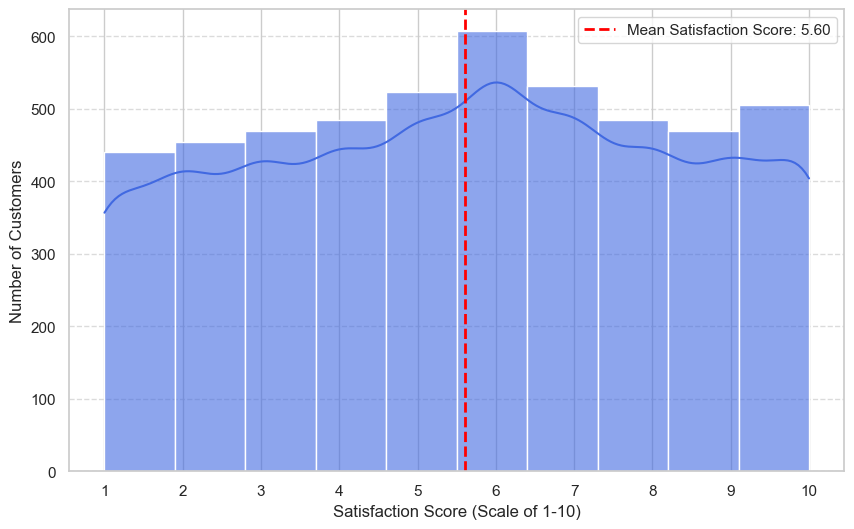

In [597]:
# Distribution plots for Satisfaction_Score
# Creating the distribution plot 
plt.figure(figsize=(10, 6))
sns.histplot(df['Satisfaction_Score'], bins=10, kde=True, color='royalblue', alpha=0.6)

# Labeling axes 
plt.xlabel("Satisfaction Score (Scale of 1-10)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Adding annotations for clarity
plt.axvline(df['Satisfaction_Score'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f"Mean Satisfaction Score: {df['Satisfaction_Score'].mean():.2f}")
plt.legend()

# Improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 11))

# Display the visualization
plt.show()

In [598]:
# Print a description of the Satisfaction_Score distribution
print("\nSatisfaction Score Distribution Summary:\n", df['Satisfaction_Score'].describe())


Satisfaction Score Distribution Summary:
 count    4969.000000
mean        5.600121
std         2.799185
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Satisfaction_Score, dtype: float64


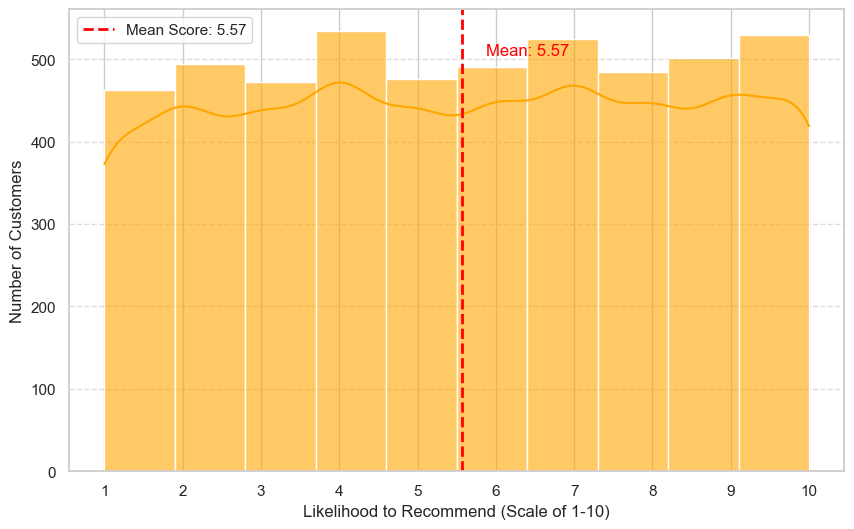

In [601]:
# Distribution plots for Likelihood_to_Recommend
plt.figure(figsize=(10, 6))
sns.histplot(df['Likelihood_to_Recommend'], bins=10, kde=True, color='orange', alpha=0.6)

# Adding a mean line for better interpretation
mean_value = df['Likelihood_to_Recommend'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, 
            label=f"Mean Score: {mean_value:.2f}")

# Adding annotations for clarity
plt.text(mean_value + 0.3, plt.ylim()[1] * 0.9, f"Mean: {mean_value:.2f}", color='red', fontsize=12)

# Labeling axes clearly
plt.xlabel("Likelihood to Recommend (Scale of 1-10)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Improving readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 11))

# Displaying the legend
plt.legend()

# Display the visualization
plt.show()

In [602]:
# Print a description of the Likelihood_to_Recommend distribution
print("\nLikelihood to Recommend Distribution Summary:\n", df['Likelihood_to_Recommend'].describe())


Likelihood to Recommend Distribution Summary:
 count    4969.000000
mean        5.569732
std         2.867726
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Likelihood_to_Recommend, dtype: float64


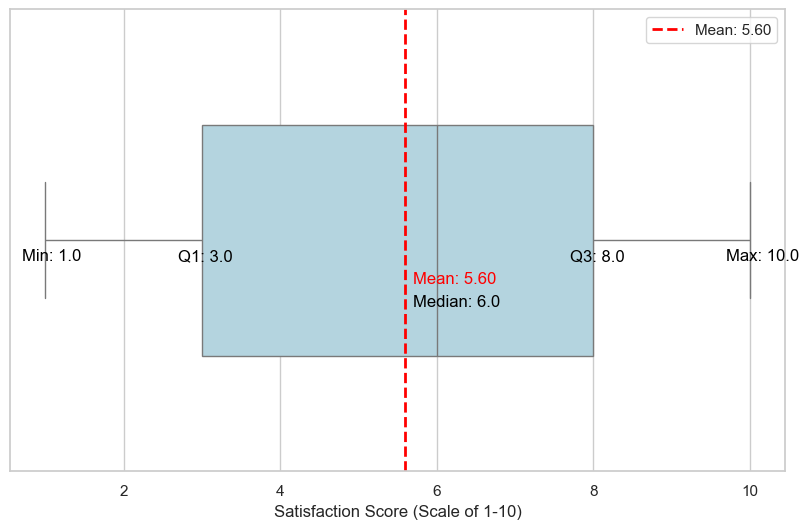

In [605]:
# Boxplot for Satisfaction Score
# Create boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['Satisfaction_Score'], color='lightblue', width=0.5)

# Calculating key statistics
mean_value = df['Satisfaction_Score'].mean()
median_value = df['Satisfaction_Score'].median()
q1 = df['Satisfaction_Score'].quantile(0.25)
q3 = df['Satisfaction_Score'].quantile(0.75)
min_value = df['Satisfaction_Score'].min()
max_value = df['Satisfaction_Score'].max()

# Adding mean marker
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")

# Adding annotations for key statistics
plt.text(mean_value + 0.1, 0.1, f"Mean: {mean_value:.2f}", color='red', fontsize=12, verticalalignment='bottom')
plt.text(median_value - 0.3, 0.15, f"Median: {median_value}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(q1 - 0.3, 0.05, f"Q1: {q1}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(q3 - 0.3, 0.05, f"Q3: {q3}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(min_value - 0.3, 0.05, f"Min: {min_value}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(max_value - 0.3, 0.05, f"Max: {max_value}", color='black', fontsize=12, verticalalignment='bottom')

# Labeling axes clearly
plt.xlabel("Satisfaction Score (Scale of 1-10)", fontsize=12)

# Displaying the legend
plt.legend()

# Display the visualization
plt.show()

In [607]:
# Print the summary statistics for Satisfaction Score
print("\nSatisfaction Score Summary:\n", df['Satisfaction_Score'].describe())


Satisfaction Score Summary:
 count    4969.000000
mean        5.600121
std         2.799185
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Satisfaction_Score, dtype: float64


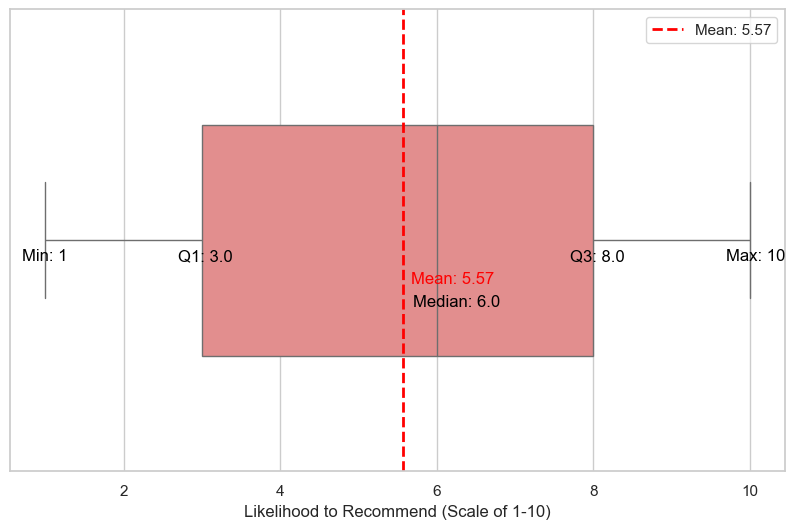

In [609]:
# Boxplot for Likelihood to Recommend
# Create boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['Likelihood_to_Recommend'], color='lightcoral', width=0.5)

# Calculating key statistics
mean_value = df['Likelihood_to_Recommend'].mean()
median_value = df['Likelihood_to_Recommend'].median()
q1 = df['Likelihood_to_Recommend'].quantile(0.25)
q3 = df['Likelihood_to_Recommend'].quantile(0.75)
min_value = df['Likelihood_to_Recommend'].min()
max_value = df['Likelihood_to_Recommend'].max()

# Adding mean marker
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")

# Adding annotations for key statistics
plt.text(mean_value + 0.1, 0.1, f"Mean: {mean_value:.2f}", color='red', fontsize=12, verticalalignment='bottom')
plt.text(median_value - 0.3, 0.15, f"Median: {median_value}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(q1 - 0.3, 0.05, f"Q1: {q1}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(q3 - 0.3, 0.05, f"Q3: {q3}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(min_value - 0.3, 0.05, f"Min: {min_value}", color='black', fontsize=12, verticalalignment='bottom')
plt.text(max_value - 0.3, 0.05, f"Max: {max_value}", color='black', fontsize=12, verticalalignment='bottom')

# Labeling axes clearly
plt.xlabel("Likelihood to Recommend (Scale of 1-10)", fontsize=12)

# Displaying the legend
plt.legend()

# Display the visualization
plt.show()

In [611]:
# Print the summary statistics for Likelihood to Recommend
print("\nLikelihood to Recommend Summary:\n", df['Likelihood_to_Recommend'].describe())


Likelihood to Recommend Summary:
 count    4969.000000
mean        5.569732
std         2.867726
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Likelihood_to_Recommend, dtype: float64


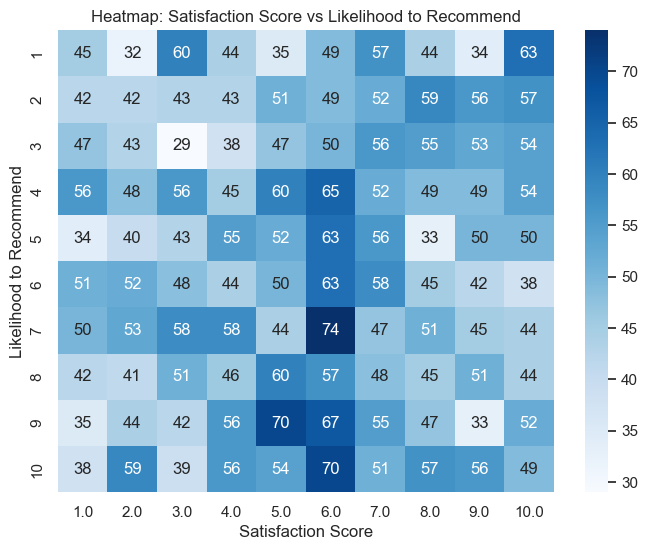

In [613]:
# Heatmap for Satisfaction Score vs Likelihood to Recommend
plt.figure(figsize=(8, 6))
heatmap_data = df.pivot_table(index='Likelihood_to_Recommend', columns='Satisfaction_Score', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Satisfaction Score')
plt.ylabel('Likelihood to Recommend')
plt.title('Heatmap: Satisfaction Score vs Likelihood to Recommend')
plt.show()

In [615]:
# Print the heatmap data to verify the table
print("\nHeatmap Data (Satisfaction Score vs Likelihood to Recommend):\n", heatmap_data)


Heatmap Data (Satisfaction Score vs Likelihood to Recommend):
 Satisfaction_Score       1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
Likelihood_to_Recommend                                                         
1                          45    32    60    44    35    49    57    44    34   
2                          42    42    43    43    51    49    52    59    56   
3                          47    43    29    38    47    50    56    55    53   
4                          56    48    56    45    60    65    52    49    49   
5                          34    40    43    55    52    63    56    33    50   
6                          51    52    48    44    50    63    58    45    42   
7                          50    53    58    58    44    74    47    51    45   
8                          42    41    51    46    60    57    48    45    51   
9                          35    44    42    56    70    67    55    47    33   
10                         38    59    39    

In [617]:
# Create a copy of the customer feedback dataset for feature engineering
df_fe = df.copy()

# 1. Frequency of Feedback: Calculate how many times each customer has provided feedback
df_fe['Frequency'] = df_fe.groupby('Customer_ID')['Satisfaction_Score'].transform('count')
print("\nFrequency of Feedback per Customer:\n", df_fe[['Customer_ID', 'Frequency']].drop_duplicates().head())


Frequency of Feedback per Customer:
    Customer_ID  Frequency
0            1          2
1            2          3
2            3          3
3            4          6
4            5          9


In [619]:
# 2. Satisfaction Variability: Measures consistency of the customer's satisfaction
df_fe['Satisfaction_Variability'] = df_fe.groupby('Customer_ID')['Satisfaction_Score'].transform(
    lambda x: np.std(x) / np.mean(x) if np.mean(x) > 0 else 0
)
print("\nSatisfaction Variability (Standard Deviation / Mean) per Customer:\n", df_fe[['Customer_ID', 'Satisfaction_Variability']].drop_duplicates().head())


Satisfaction Variability (Standard Deviation / Mean) per Customer:
    Customer_ID  Satisfaction_Variability
0            1                  0.176471
1            2                  0.435143
2            3                  0.203961
3            4                  0.344176
4            5                  0.293610


In [621]:
# 3. Engagement from Satisfaction Scores: Measure customer engagement through average satisfaction score
df_fe['Monetary_Engagement'] = df_fe.groupby('Customer_ID')['Satisfaction_Score'].transform('mean')
print("\nMonetary Engagement (Average Satisfaction Score) per Customer:\n", df_fe[['Customer_ID', 'Monetary_Engagement']].drop_duplicates().head())


Monetary Engagement (Average Satisfaction Score) per Customer:
    Customer_ID  Monetary_Engagement
0            1             8.500000
1            2             4.333333
2            3             8.333333
3            4             5.500000
4            5             6.444444


In [623]:
# 4. Satisfaction Feedback Category: Categorize feedback based on satisfaction score
def categorize_feedback(score):
    if score == 10:
        return "Excellent"
    elif 8 <= score <= 9:
        return "Very satisfied"
    elif 6 <= score <= 7:
        return "Good Service"
    elif 4 <= score <= 5:
        return "Needs improvement"
    elif 1 <= score <= 3:
        return "Unsatisfactory"
    return None

df_fe['Satisfaction_Category'] = df_fe['Satisfaction_Score'].apply(categorize_feedback)
print("\nSatisfaction Category per Customer based on Satisfaction Score:\n", df_fe[['Customer_ID', 'Satisfaction_Score', 'Satisfaction_Category']].drop_duplicates().head())


Satisfaction Category per Customer based on Satisfaction Score:
    Customer_ID  Satisfaction_Score Satisfaction_Category
0            1                10.0             Excellent
1            2                 3.0        Unsatisfactory
2            3                10.0             Excellent
3            4                 7.0          Good Service
4            5                 8.0        Very satisfied


In [625]:
# 5. Likelihood to Recommend Category: Categorize Likelihood_to_Recommend into 'Low', 'Medium', 'High'
df_fe['Recommendation_Category'] = pd.cut(
    df_fe['Likelihood_to_Recommend'], 
    bins=[0, 4, 7, 10], 
    labels=['Low', 'Medium', 'High'], 
    right=True
)
print("\nRecommendation Category based on Likelihood to Recommend:\n", df_fe[['Customer_ID', 'Likelihood_to_Recommend', 'Recommendation_Category']].drop_duplicates().head())


Recommendation Category based on Likelihood to Recommend:
    Customer_ID  Likelihood_to_Recommend Recommendation_Category
0            1                        9                    High
1            2                        3                     Low
2            3                        1                     Low
3            4                        4                     Low
4            5                        7                  Medium


In [627]:
# Display the feature-engineered dataset sample
df_feature_engineered = df_fe[['Customer_ID', 'Frequency', 'Satisfaction_Variability', 'Monetary_Engagement',
                              'Satisfaction_Category', 'Recommendation_Category']].drop_duplicates()

print("\nFeature Engineered Data Sample:\n", df_feature_engineered.head())


Feature Engineered Data Sample:
    Customer_ID  Frequency  Satisfaction_Variability  Monetary_Engagement  \
0            1          2                  0.176471             8.500000   
1            2          3                  0.435143             4.333333   
2            3          3                  0.203961             8.333333   
3            4          6                  0.344176             5.500000   
4            5          9                  0.293610             6.444444   

  Satisfaction_Category Recommendation_Category  
0             Excellent                    High  
1        Unsatisfactory                     Low  
2             Excellent                     Low  
3          Good Service                     Low  
4        Very satisfied                  Medium  


In [629]:
# Save the feature-engineered transaction data 
df_feature_engineered.to_csv('feature_engineered_feedback.csv', index=False)

Preprocessing Product Offering Data

In [632]:
## Load the dataset from a CSV file into a DataFrame

df = pd.read_csv("/Users/gillianmondero/Downloads/Product_Offering_Data.csv")
# Display the first five rows of the dataset to get an overview
print(df.head())  

# Print a summary of the dataset, including data types and missing values
print(df.info())  

   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   

   Target_Age_Group Target_Income_Group  
0               NaN              Medium  
1               NaN                 Low  
2               NaN                High  
3               NaN                High  
4               NaN              Medium  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null  

In [634]:
# Identify duplicate rows in the DataFrame
duplicates = df[df.duplicated()]  

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicates.shape[0]}")  

# Store the shape of the DataFrame before removing duplicates
df_before = df.shape  

# Remove duplicate rows, keeping only the first occurrence
df = df.drop_duplicates()  

# Store the shape of the DataFrame after removing duplicates
df_after = df.shape  

# Print the shape of the DataFrame before and after removing duplicates
print(f"Shape before removing duplicates: {df_before}")  
print(f"Shape after removing duplicates: {df_after}")

Number of duplicate rows: 5
Shape before removing duplicates: (15, 6)
Shape after removing duplicates: (10, 6)


In [636]:
# Check for missing values
print("\nMissing values before handling:\n", df.isnull().sum())  # Print the missing values count for each column


Missing values before handling:
 Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       10
Target_Income_Group     0
dtype: int64


In [638]:
# Remove Target_Age_Group column since it doesn't have any values.
if 'Target_Age_Group' in df.columns:
    df.drop(columns=['Target_Age_Group'], inplace=True)
    print("\nUpdated DataFrame after removing 'Target_Age_Group':\n", df.head(20))  # Display first 20 rows after dropping the column


Updated DataFrame after removing 'Target_Age_Group':
    Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   
5           6                  Personal Loan             Loan     Medium   
6           7          Youth Savings Account  Savings Account        Low   
7           8     Retirement Investment Fund       Investment       High   
8           9                  Business Loan             Loan     Medium   
9          10             Travel Credit Card      Credit Card     Medium   

  Target_Income_Group  
0              Medium  
1                 Low  
2                High  
3           

In [640]:
# Apply one-hot encoding with all the product types 
df = pd.get_dummies(df, columns=['Product_Type', 'Risk_Level', 'Target_Income_Group'], drop_first=False)

# Display the updated DataFrame 
print(df.head())  # Use print to display the DataFrame

   Product_ID                   Product_Name  Product_Type_Credit Card  \
0           1           Platinum Credit Card                      True   
1           2           Gold Savings Account                     False   
2           3  High-Yield Investment Account                     False   
3           4                  Mortgage Loan                     False   
4           5                      Auto Loan                     False   

   Product_Type_Investment  Product_Type_Loan  Product_Type_Savings Account  \
0                    False              False                         False   
1                    False              False                          True   
2                     True              False                         False   
3                    False               True                         False   
4                    False               True                         False   

   Risk_Level_High  Risk_Level_Low  Risk_Level_Medium  \
0            False     

In [642]:
# EDA - Plot the distribution of categorical variables
# Define a list of categorical columns we want to analyze
categorical_columns = ['Product_Type_Credit Card', 'Product_Type_Investment', 'Product_Type_Loan', 'Product_Type_Savings Account',
                       'Risk_Level_High', 'Risk_Level_Low', 'Risk_Level_Medium',
                       'Target_Income_Group_High', 'Target_Income_Group_Low', 'Target_Income_Group_Medium']

# Print the list of categorical columns to confirm what we are working with
print("Categorical Columns to Analyze:", categorical_columns)

Categorical Columns to Analyze: ['Product_Type_Credit Card', 'Product_Type_Investment', 'Product_Type_Loan', 'Product_Type_Savings Account', 'Risk_Level_High', 'Risk_Level_Low', 'Risk_Level_Medium', 'Target_Income_Group_High', 'Target_Income_Group_Low', 'Target_Income_Group_Medium']


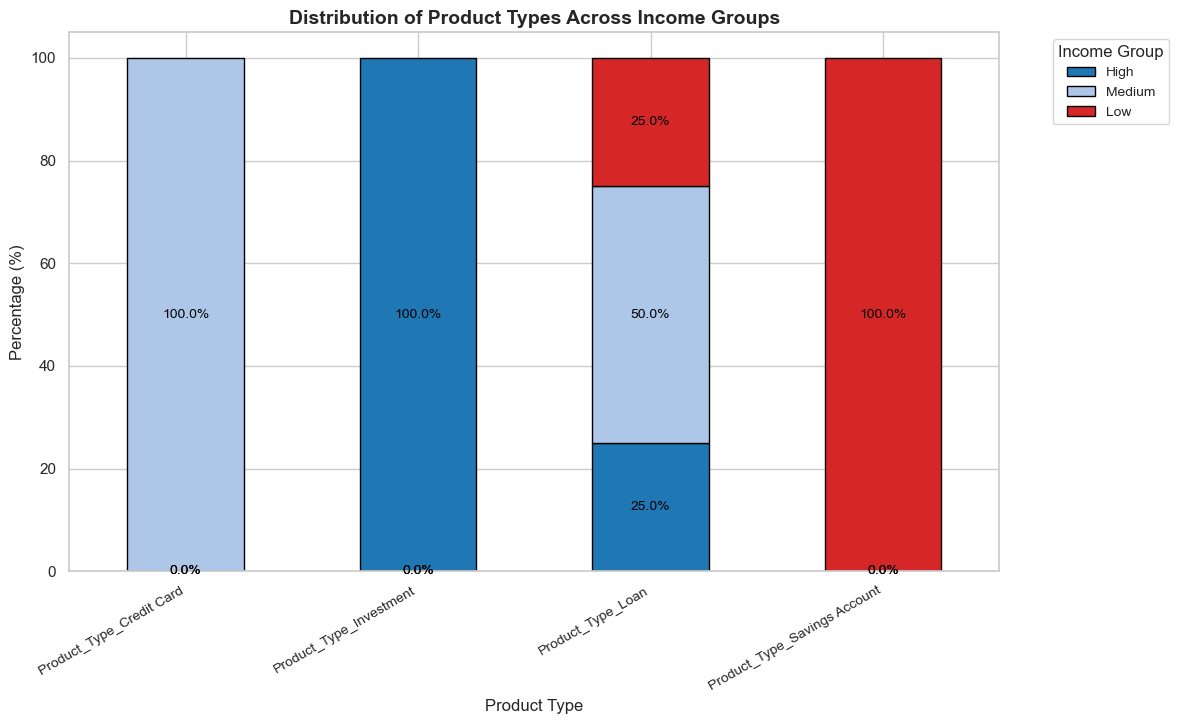

In [644]:
# Selecting relevant columns for product types and income groups
product_types = ['Product_Type_Credit Card', 'Product_Type_Investment', 
                 'Product_Type_Loan', 'Product_Type_Savings Account']
income_groups = ['Target_Income_Group_High', 'Target_Income_Group_Medium', 'Target_Income_Group_Low']

# Initialize a dictionary to store aggregated percentages
aggregated_data = {product: {'High': 0, 'Medium': 0, 'Low': 0} for product in product_types}

# Compute percentage distribution for each product type
for product in product_types:
    total_count = df[product].sum()  # Count of each product type
    if total_count > 0:  # Avoid division by zero
        for income, label in zip(income_groups, ['High', 'Medium', 'Low']):
            count = df[(df[product] == True) & (df[income] == True)].shape[0]
            aggregated_data[product][label] = (count / total_count) * 100

# Convert to DataFrame
aggregated_df = pd.DataFrame.from_dict(aggregated_data, orient='index')

# Set style
sns.set(style="whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Define custom colors for the income groups
colors = ["#1f77b4", "#aec7e8", "#d62728"]  # High (Blue), Medium (Gray), Low (Red)

# Plot stacked bar chart with corrected colormap handling
aggregated_df.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax)

# Title and labels with improved formatting
plt.title("Distribution of Product Types Across Income Groups", fontsize=14, fontweight='bold')
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type='center', fontsize=10, color='black')

# Move legend outside the plot for clarity
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show plot
plt.show()

In [646]:
# Feature Engineering
# 1. Primary Financial Product

# Identifies the financial product type that the customer primarily uses.
# The idxmax() function returns the column name (i.e., product type) with the highest value (True/False).
# We remove the "Product_Type_" prefix for readability.

product_columns = ["Product_Type_Credit Card", "Product_Type_Investment", "Product_Type_Loan", "Product_Type_Savings Account"]
df["Primary_Product"] = df[product_columns].idxmax(axis=1).str.replace("Product_Type_", "", regex=False)

print("\nPrimary Financial Product:")
print(df[["Product_ID", "Primary_Product"]].head())


Primary Financial Product:
   Product_ID  Primary_Product
0           1      Credit Card
1           2  Savings Account
2           3       Investment
3           4             Loan
4           5             Loan


In [648]:
# 2. Customer Dependency Index
# Measures customer reliance on high-dependency products.
# - Credit Cards (Score: 2) → Higher dependency on borrowed funds.
# - Loans (Score: 1) → Moderate dependency on debt.
# Higher values suggest a higher financial dependency.

df["Customer_Dependency_Index"] = (df["Product_Type_Credit Card"] * 2) + df["Product_Type_Loan"]

print("\nCustomer Dependency Index:")
print(df[["Product_ID", "Customer_Dependency_Index"]].head())


Customer Dependency Index:
   Product_ID  Customer_Dependency_Index
0           1                          2
1           2                          0
2           3                          0
3           4                          1
4           5                          1


In [650]:
# 3. Income Group Aggregation
# Converts binary income group columns into a **single categorical feature**.

income_columns = ["Target_Income_Group_High", "Target_Income_Group_Medium", "Target_Income_Group_Low"]
df["Income_Group"] = df[income_columns].idxmax(axis=1).str.replace("Target_Income_Group_", "", regex=False)

print("\nIncome Group Aggregation:")
print(df[["Product_ID", "Income_Group"]].head())


Income Group Aggregation:
   Product_ID Income_Group
0           1       Medium
1           2          Low
2           3         High
3           4         High
4           5       Medium


In [652]:
# 4. Income-Product Matching Score
# Assesses how well a customer's financial products align with their income level.
# - High-income customers → Typically have **Investments & Loans**.
# - Medium-income customers → Typically have **Savings Accounts**.
# - Low-income customers → Typically rely on **Credit Cards**.

df["Income_Product_Matching_Score"] = (
(df["Target_Income_Group_High"] * (df["Product_Type_Investment"] + df["Product_Type_Loan"])) +
(df["Target_Income_Group_Medium"] * (df["Product_Type_Savings Account"])) +
(df["Target_Income_Group_Low"] * df["Product_Type_Credit Card"])
)

print("\nIncome-Product Matching Score:")
print(df[["Product_ID", "Income_Product_Matching_Score"]].head())


Income-Product Matching Score:
   Product_ID  Income_Product_Matching_Score
0           1                          False
1           2                          False
2           3                           True
3           4                           True
4           5                          False


In [654]:
# Show the most essential features.

final_features = [
"Product_ID", "Product_Name", "Primary_Product",
"Income_Group", "Customer_Dependency_Index"
]

df_final = df[final_features]

print("\nCustomer Features:")
print(df_final.head())


Customer Features:
   Product_ID                   Product_Name  Primary_Product Income_Group  \
0           1           Platinum Credit Card      Credit Card       Medium   
1           2           Gold Savings Account  Savings Account          Low   
2           3  High-Yield Investment Account       Investment         High   
3           4                  Mortgage Loan             Loan         High   
4           5                      Auto Loan             Loan       Medium   

   Customer_Dependency_Index  
0                          2  
1                          0  
2                          0  
3                          1  
4                          1  


In [656]:
# Save the feature-engineered transaction data 
df.to_csv('cleaned_product_offering_data.csv', index=False)

In [658]:
# Load the datasets
product_offering_df = pd.read_csv("/Users/gillianmondero/cleaned_product_offering_data.csv")
customer_transactions_df = pd.read_csv("/Users/gillianmondero/feature_engineered_transactions.csv")
customer_feedback_df = pd.read_csv("/Users/gillianmondero/feature_engineered_feedback.csv")

# Display the first few rows of each dataset
product_offering_df.head(), customer_transactions_df.head(), customer_feedback_df.head()

(   Product_ID                   Product_Name  Product_Type_Credit Card  \
 0           1           Platinum Credit Card                      True   
 1           2           Gold Savings Account                     False   
 2           3  High-Yield Investment Account                     False   
 3           4                  Mortgage Loan                     False   
 4           5                      Auto Loan                     False   
 
    Product_Type_Investment  Product_Type_Loan  Product_Type_Savings Account  \
 0                    False              False                         False   
 1                    False              False                          True   
 2                     True              False                         False   
 3                    False               True                         False   
 4                    False               True                         False   
 
    Risk_Level_High  Risk_Level_Low  Risk_Level_Medium  \
 0      

In [660]:
# Merge customer transactions with customer feedback using Customer_ID
merged_df = customer_transactions_df.merge(customer_feedback_df, on="Customer_ID", how="left")

# Display the merged dataset 
print("Merged Transactions and Feedback:")
print(merged_df)  

Merged Transactions and Feedback:
      Customer_ID  Recency  Frequency_x  Monetary_Value  \
0               1     26.0          6.0         16836.0   
1               1     26.0          6.0         16836.0   
2               2     67.0          2.0          4907.0   
3               2     67.0          2.0          4907.0   
4               2     67.0          2.0          4907.0   
...           ...      ...          ...             ...   
4135          999     14.0          9.0         23962.0   
4136          999     14.0          9.0         23962.0   
4137         1000     37.0          6.0          9652.0   
4138         1000     37.0          6.0          9652.0   
4139         1000     37.0          6.0          9652.0   

      Transaction_Amount_Variability  Days_Since_First_Transaction  \
0                           0.670928                         180.0   
1                           0.670928                         180.0   
2                           0.161606           

In [666]:
# Drop unnecessary column
merged_df.drop(columns=["Customer_ID"], inplace=True)
print("DataFrame after dropping unnecessary column:")
print(merged_df.head())

DataFrame after dropping unnecessary columns:
   Recency  Frequency_x  Monetary_Value  Transaction_Amount_Variability  \
0     26.0          6.0         16836.0                        0.670928   
1     26.0          6.0         16836.0                        0.670928   
2     67.0          2.0          4907.0                        0.161606   
3     67.0          2.0          4907.0                        0.161606   
4     67.0          2.0          4907.0                        0.161606   

   Days_Since_First_Transaction  Avg_Transaction_Gap  Is_Weekend  \
0                         180.0                 30.0    0.166667   
1                         180.0                 30.0    0.166667   
2                         104.0                 52.0    0.500000   
3                         104.0                 52.0    0.500000   
4                         104.0                 52.0    0.500000   

   Frequent_Large_Spender  Frequency_y  Satisfaction_Variability  \
0                     0.0 

In [668]:
# Separate numerical and categorical features
num_features = merged_df.select_dtypes(include=['number']).columns
cat_features = merged_df.select_dtypes(include=['object']).columns
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: Index(['Recency', 'Frequency_x', 'Monetary_Value',
       'Transaction_Amount_Variability', 'Days_Since_First_Transaction',
       'Avg_Transaction_Gap', 'Is_Weekend', 'Frequent_Large_Spender',
       'Frequency_y', 'Satisfaction_Variability', 'Monetary_Engagement',
       'Cluster'],
      dtype='object')
Categorical Features: Index(['Satisfaction_Category', 'Recommendation_Category'], dtype='object')


In [670]:
# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df[num_features])
print("Scaled Numerical Features:")
print(scaled_features[:5])

Scaled Numerical Features:
[[-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611 -0.76139972]
 [-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611 -0.76139972]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012 -0.76139972]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012 -0.76139972]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012 -0.76139972]]


In [672]:
# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(merged_df[cat_features])
print("Encoded Categorical Features:")
print(encoded_categorical[:5])

Encoded Categorical Features:
[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]]


In [674]:
# Combine processed features
final_dataset = np.hstack([scaled_features, encoded_categorical])
print("Final Combined Dataset:")
print(final_dataset[:5])

Final Combined Dataset:
[[-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611 -0.76139972
   0.          0.          0.          0.          0.          0.        ]
 [-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611 -0.76139972
   1.          0.          0.          0.          0.          0.        ]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012 -0.76139972
   0.          0.          1.          0.          1.          0.        ]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012 -0.76139972
   1.          0.          0.          0.          0.          1.        ]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072

In [676]:
# Apply PCA to reduce dimensionality (keeping 95% variance)
pca = PCA(n_components=0.95)
final_dataset_pca = pca.fit_transform(final_dataset)
print("Final Dataset after PCA:")
print(final_dataset_pca[:5])

Final Dataset after PCA:
[[ 1.75846338  0.97726368 -2.26928954 -1.86525687 -1.15137107  0.41447139
   0.07650448  0.19834021  0.76625575 -0.17988161  0.18799159 -0.05510876]
 [ 1.76299574  0.99432672 -2.2942812  -1.89100917 -1.13707204  0.41731852
   0.0591235   0.15861504  0.65582832 -0.18616438 -0.50045954 -0.56757632]
 [-1.35210775  2.10119603  1.01725459  0.69457127 -0.34217047  1.98149482
  -0.92366341  0.95668223 -0.22628729  0.73389409  0.58322948 -0.38003414]
 [-1.33527425  2.1569488   0.91195882  0.60213047 -0.29952852  1.96094731
  -0.97878985  0.89416954 -0.50935744 -0.67940252 -0.77171807 -0.45027949]
 [-1.35569452  2.09959434  1.02824802  0.68914952 -0.36154955  1.98673968
  -0.94407535  0.95777705 -0.40426897 -0.66574682  0.61469332 -0.38448743]]


In [697]:
# Finding optimal K using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_dataset_pca)
    inertia.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_}")

# Debugging print to ensure inertia is correctly populated
print("Final Inertia Values:", inertia)

K=1, Inertia=51686.12242247659
K=2, Inertia=42795.33053391463
K=3, Inertia=37120.51621665942
K=4, Inertia=32522.127225803597
K=5, Inertia=30290.50941982698
K=6, Inertia=29029.423483824714
K=7, Inertia=27894.125269824763
K=8, Inertia=26961.759787978495
K=9, Inertia=26058.906556008013
K=10, Inertia=25286.585961212375
Final Inertia Values: [51686.12242247659, 42795.33053391463, 37120.51621665942, 32522.127225803597, 30290.50941982698, 29029.423483824714, 27894.125269824763, 26961.759787978495, 26058.906556008013, 25286.585961212375]


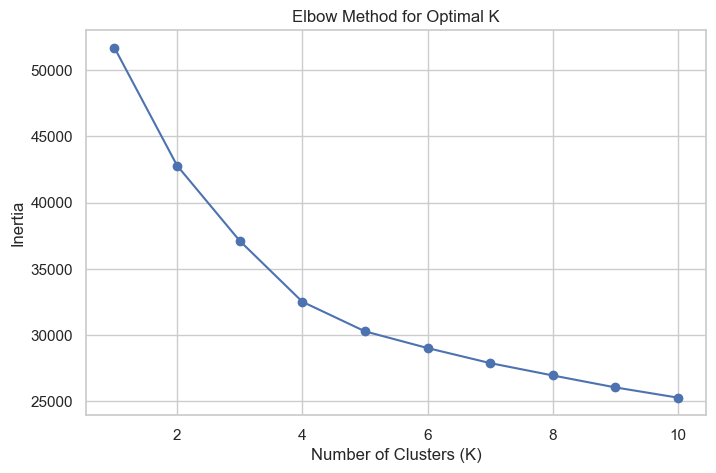

In [699]:
# Fix potential shape mismatch issue
if len(inertia) == len(K_range):
    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()
else:
    print("Error: Mismatch in lengths of K_range and inertia. Debug needed.")

In [701]:
# Evaluate silhouette scores for K=3 and K=4
k_values = [3, 4]
cluster_results = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(final_dataset_pca)
    silhouette = silhouette_score(final_dataset_pca, clusters)
    cluster_results[k] = silhouette
    print(f"K={k}, Silhouette Score={silhouette}")

K=3, Silhouette Score=0.16100490410442606
K=4, Silhouette Score=0.1851797271324425


In [703]:
# Select best K based on silhouette score
best_k = max(cluster_results, key=cluster_results.get)
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_clusters = best_kmeans.fit_predict(final_dataset_pca)
print(f"Best K={best_k}, Final Clusters Assigned:")
print(final_clusters[:10])

Best K=4, Final Clusters Assigned:
[0 0 0 0 0 3 3 3 0 0]


In [705]:
# Add clusters to the original dataset
merged_df["Cluster"] = final_clusters

# Display the clustered dataset
print("\nClustered Customer Segments:")
print(merged_df)


Clustered Customer Segments:
      Recency  Frequency_x  Monetary_Value  Transaction_Amount_Variability  \
0        26.0          6.0         16836.0                        0.670928   
1        26.0          6.0         16836.0                        0.670928   
2        67.0          2.0          4907.0                        0.161606   
3        67.0          2.0          4907.0                        0.161606   
4        67.0          2.0          4907.0                        0.161606   
...       ...          ...             ...                             ...   
4135     14.0          9.0         23962.0                        0.446405   
4136     14.0          9.0         23962.0                        0.446405   
4137     37.0          6.0          9652.0                        0.450036   
4138     37.0          6.0          9652.0                        0.450036   
4139     37.0          6.0          9652.0                        0.450036   

      Days_Since_First_Transactio